In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy import stats
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['fast'])
plt.style.use(['seaborn-poster'])
print(plt.style.available)

DATA_FOLDER = "/data/cubes/"
DATA_PATH = os.path.abspath(os.getcwd()) + DATA_FOLDER
invalid_participant = [1,4,18]

['dark_background', 'seaborn-colorblind', 'seaborn-talk', 'seaborn-paper', 'seaborn-deep', 'seaborn-poster', 'fast', 'bmh', 'seaborn-whitegrid', 'ggplot', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-pastel', '_classic_test', 'seaborn-notebook', 'classic', 'seaborn-white', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-muted', 'seaborn', 'grayscale', 'seaborn-bright', 'Solarize_Light2']


In [33]:
# Iterate over files and find csv files that have allocation of cubes for each participant
dfs = []
redundant = []
for path in Path(DATA_PATH).rglob('participant_*.csv'): 
    participant_id = int(re.search(r'\d+', path.name).group())
    
    if participant_id in invalid_participant:
        continue
    
    if participant_id not in redundant:
        temp = pd.read_csv(path)
        temp["scene"] = temp["scene"].str[-1:]
        temp["scene"] = temp["scene"].astype('int')
        temp["participant"] = participant_id
        temp["NVC_A"] = False
        temp["NVC_B"] = False

        if int(participant_id) % 2 == 0:
            nvc = "A"
            temp["NVC_A"] = True
        else:
            nvc = "B"
            temp["NVC_B"] = True

        temp["NVC"] = nvc
        temp["allocation_metric"] = (temp["robot_b"] - temp["robot_a"]) / (temp["robot_a"] + temp["robot_b"])
        dfs.append(temp)
        redundant.append(participant_id)
    
raw_data = pd.concat(dfs, axis=0, ignore_index=True)
raw_data["allocation_metric"].fillna(0.0, inplace=True) # handle 0/0
raw_data.head()

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC,allocation_metric
0,0,1,1,39,False,True,B,0.000000
1,1,1,0,39,False,True,B,-1.000000
2,2,1,2,39,False,True,B,0.333333
3,3,4,3,39,False,True,B,-0.142857
4,4,0,7,39,False,True,B,1.000000


In [34]:
odd_participants_data = raw_data[raw_data["participant"] % 2 != 0]
odd_participants_data = odd_participants_data[odd_participants_data["scene"] >= 1]
even_participants_data = raw_data[raw_data["participant"] % 2 == 0]
even_participants_data = even_participants_data[even_participants_data["scene"] >= 1]

In [35]:
odd_participants_data.head()

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC,allocation_metric
1,1,1,0,39,False,True,B,-1.000000
2,2,1,2,39,False,True,B,0.333333
3,3,4,3,39,False,True,B,-0.142857
4,4,0,7,39,False,True,B,1.000000
11,1,2,3,41,False,True,B,0.200000


In [36]:
odd_cubes_per_participant = odd_participants_data.groupby("participant").sum()
even_cubes_per_participant = even_participants_data.groupby("participant").sum()

odd_cubes_per_participant = odd_cubes_per_participant.drop(columns=['scene'])
odd_cubes_per_participant = odd_cubes_per_participant.drop(columns=['NVC_A', 'NVC_B'])

even_cubes_per_participant = even_cubes_per_participant.drop(columns=['scene'])
even_cubes_per_participant = even_cubes_per_participant.drop(columns=['NVC_A', 'NVC_B'])


odd_cubes_per_participant['allocation_metric'] = odd_cubes_per_participant['allocation_metric'] / 4

odd_cubes_per_participant['total_cubes'] = (odd_cubes_per_participant['robot_a'] + 
                                                odd_cubes_per_participant['robot_b'])
even_cubes_per_participant['total_cubes'] = (even_cubes_per_participant['robot_a'] + 
                                                even_cubes_per_participant['robot_b'])

odd_cubes_per_participant

,robot_a,robot_b,allocation_metric,total_cubes
participant,,,,
3,12,11,0.011905,23
5,10,13,0.146429,23
7,7,17,0.422619,24
9,12,12,0.002381,24
11,4,7,0.083333,11
13,13,11,-0.014286,24
15,13,14,0.047619,27
17,7,10,-0.083333,17
19,13,8,-0.150000,21


In [37]:
odd_cubes_per_participant.sum()

robot_a              189.000000
robot_b              216.000000
allocation_metric      1.391667
total_cubes          405.000000
dtype: float64

# Participants which had robotB as NVC

In [ ]:
odd_cubes_per_participant_plot_data = odd_cubes_per_participant.drop(columns=['total_cubes'])
odd_cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), 
                                         title="The distribution of cubes for each robot when NVC is B.", 
                                         yticks=range(0,25,5))

# Participants which had robotA as NVC

In [ ]:
even_cubes_per_participant.head()

In [ ]:
even_cubes_per_participant.sum()

In [ ]:
even_cubes_per_participant_plot_data = even_cubes_per_participant.drop(columns=['total_cubes'])
even_cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), title="The distribution of cubes for each robot when NVC is A.", yticks=range(0,50,5))

# NVC-B group by scene

In [ ]:
odd_participants_by_scene = odd_participants_data.groupby("scene").sum().drop(columns=['participant', 'NVC_A', 'NVC_B'])
odd_participants_by_scene

In [ ]:
temp = odd_participants_by_scene
temp['robot a mean'] = odd_participants_by_scene['robot_a']/len(odd_participants_by_scene)
temp['robot b mean'] = odd_participants_by_scene['robot_b']/len(odd_participants_by_scene)
temp

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,5))
plt.yticks(range(40,150,5))
plt.scatter(odd_participants_by_scene.index, odd_participants_by_scene["robot_a"], label="A")
plt.scatter(odd_participants_by_scene.index, odd_participants_by_scene["robot_b"], label="B")
plt.xlabel('Scene')
plt.ylabel('Total Cubes')
plt.legend()
plt.show()

# NVC-A group by scene

In [ ]:
even_participants_by_scene = even_participants_data.groupby("scene").sum().drop(columns=['participant']).drop(columns=['NVC_A']).drop(columns=['NVC_B'])
even_participants_by_scene

In [ ]:
temp = even_participants_by_scene
temp['robot a mean'] = even_participants_by_scene['robot_a']/len(even_participants_by_scene)
temp['robot b mean'] = even_participants_by_scene['robot_b']/len(even_participants_by_scene)
temp

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,5))
plt.yticks(range(30,150,5))
plt.scatter(even_participants_by_scene.index, even_participants_by_scene["robot_a"], label="A")
plt.scatter(even_participants_by_scene.index, even_participants_by_scene["robot_b"], label="B")
plt.xlabel('Scene')
plt.ylabel('Total Cubes')
plt.legend()
plt.show()

In [ ]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
ax = even_participants_by_scene.plot(kind = 'box', color = color, sym='', figsize=(8,6), yticks=range(40,150,10),
                                    title = "cubes allocation when NVC is A")
ax.set_ylabel("total cubes")

In [ ]:
color = {'boxes': 'Red', 'whiskers': 'Blue','medians': 'DarkBlue', 'caps': 'Black'}
ax = odd_participants_by_scene.plot(kind = 'box', color = color, sym='', figsize=(8,6),yticks=range(30,150,10),
                                    title = "cubes allocation when NVC is B")
ax.set_ylabel("total cubes ")

In [ ]:
odd_participants_data.groupby(["participant", "scene"]).sum().head()

In [ ]:
odd_participants_data.groupby(["participant", "scene"]).sum().drop(columns=['NVC_A','NVC_B']).plot(kind='bar', figsize=(20,10), by='participant')

In [ ]:
even_participants_data.groupby(["participant", "scene"]).sum().head()

In [ ]:
even_participants_data.groupby(["participant", "scene"]).sum().drop(columns=['NVC_A','NVC_B']).plot(kind='bar', figsize=(20,10))

# Separating data scene wise for participants where NVC is B

In [ ]:
#odds_scene_0 = odd_participants_data[(odd_participants_data["scene"] == 0)]
odds_scene_1 = odd_participants_data[(odd_participants_data["scene"] == 1)]
odds_scene_2 = odd_participants_data[(odd_participants_data["scene"] == 2)]
odds_scene_3 = odd_participants_data[(odd_participants_data["scene"] == 3)]
odds_scene_4 = odd_participants_data[(odd_participants_data["scene"] == 4)]

# Cubes when NVC is B (scene 1 and 2)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_1")
ax[1][0].set_ylabel("scene_2")
sns.distplot(odds_scene_1["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(odds_scene_1["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(odds_scene_2["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(odds_scene_2["robot_b"], bins=5, ax=ax[1][1])

# Cubes when NVC is B (scene 3 and 4)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_3")
ax[1][0].set_ylabel("scene_4")
sns.distplot(odds_scene_3["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(odds_scene_3["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(odds_scene_4["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(odds_scene_4["robot_b"], bins=5, ax=ax[1][1])

In [ ]:
stats.normaltest(odds_scene_1["robot_a"])

In [ ]:
stats.normaltest(odds_scene_1["robot_b"])

In [ ]:
stats.normaltest(odds_scene_2["robot_a"])

In [ ]:
stats.normaltest(odds_scene_2["robot_b"])

In [ ]:
stats.normaltest(odds_scene_3["robot_a"])

In [ ]:
stats.normaltest(odds_scene_3["robot_b"])

In [ ]:
stats.normaltest(odds_scene_4["robot_a"])

In [ ]:
stats.normaltest(odds_scene_4["robot_b"])

# Wilcoxon Test

h0: there is no difference between a robot A and robot B <br>
h1: there is a difference

Scene 1

In [ ]:
stats.wilcoxon(odds_scene_1["robot_a"], odds_scene_1["robot_b"])

Scene 2

In [ ]:
stats.wilcoxon(odds_scene_2["robot_a"], odds_scene_2["robot_b"])

Scene 3

In [ ]:
stats.wilcoxon(odds_scene_3["robot_a"], odds_scene_3["robot_b"])

scene 4

In [ ]:
stats.wilcoxon(odds_scene_4["robot_a"], odds_scene_4["robot_b"])

# Conclusion

### For scene 1,2, and 4 p-value > 0.05, accept h0

### For scene 3 p-value < 0.05, reject h0

# Pair t-test

Scene 1

In [ ]:
stats.ttest_rel(odds_scene_1["robot_a"], odds_scene_1["robot_b"])

Scene 2

In [ ]:
stats.ttest_rel(odds_scene_2["robot_a"], odds_scene_2["robot_b"])

Scene 3

In [ ]:
stats.ttest_rel(odds_scene_3["robot_a"], odds_scene_3["robot_b"])

Scene 4

In [ ]:
stats.ttest_rel(odds_scene_4["robot_a"], odds_scene_4["robot_b"])

### Conclusion
#### Scene 1, 2, 4 p-value >= 0.05, accept h0: There is no difference between a robot A and a robot B
#### Scene 3 p-value < 0.05, reject h0: There is a difference between a robot A and a robot B

# Separating data scene wise for participants where NVC is A

In [ ]:
#evens_scene_0 = even_participants_data[(even_participants_data["scene"] == 0)]
evens_scene_1 = even_participants_data[(even_participants_data["scene"] == 1)]
evens_scene_2 = even_participants_data[(even_participants_data["scene"] == 2)]
evens_scene_3 = even_participants_data[(even_participants_data["scene"] == 3)]
evens_scene_4 = even_participants_data[(even_participants_data["scene"] == 4)]

# Cubes when NVC is A (scene 1 and 2)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_1")
ax[1][0].set_ylabel("scene_2")
sns.distplot(evens_scene_1["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(evens_scene_1["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(evens_scene_2["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(evens_scene_2["robot_b"], bins=5, ax=ax[1][1])

# Cubes when NVC is A (scene 3 and 4)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_3")
ax[1][0].set_ylabel("scene_4")
sns.distplot(evens_scene_3["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(evens_scene_3["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(evens_scene_4["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(evens_scene_4["robot_b"], bins=5, ax=ax[1][1])

In [ ]:
stats.normaltest(evens_scene_1["robot_a"])

In [ ]:
stats.normaltest(evens_scene_1["robot_b"])

In [ ]:
stats.normaltest(evens_scene_2["robot_a"])

In [ ]:
stats.normaltest(evens_scene_2["robot_b"])

In [ ]:
stats.normaltest(evens_scene_3["robot_a"])

In [ ]:
stats.normaltest(evens_scene_3["robot_b"])

In [ ]:
stats.normaltest(evens_scene_4["robot_a"])

In [ ]:
stats.normaltest(evens_scene_4["robot_b"])

# Wilcoxon Test when NVC A

h0: there is no difference between a robot A and robot B <br>
h1: there is a difference

Scene 1

In [ ]:
stats.wilcoxon(evens_scene_1["robot_a"], evens_scene_1["robot_b"])

Scene 2

In [ ]:
stats.wilcoxon(evens_scene_2["robot_a"], evens_scene_2["robot_b"])

Scene 3

In [ ]:
stats.wilcoxon(evens_scene_3["robot_a"], evens_scene_3["robot_b"])

Scene 4

In [ ]:
stats.wilcoxon(evens_scene_4["robot_a"], evens_scene_4["robot_b"])

# Conclusion

### For scene 1,3, and 4 p-value > 0.05, accept h0

### For scene 2 p-value < 0.05, reject h0

# Pair t-test

Scene 1

In [ ]:
stats.ttest_rel(evens_scene_1["robot_a"], evens_scene_1["robot_b"])

Scene 2

In [ ]:
stats.ttest_rel(evens_scene_2["robot_a"], evens_scene_2["robot_b"])

Scene 3

In [ ]:
stats.ttest_rel(evens_scene_3["robot_a"], evens_scene_3["robot_b"])

Scene 4

In [ ]:
stats.ttest_rel(evens_scene_4["robot_a"], evens_scene_4["robot_b"])

### Conclusion
#### Scene 1, 3, 4 p-value >= 0.05, accept h0: There is no difference between a robot A and a robot B
#### Scene 2 p-value < 0.05, reject h0: There is a difference between a robot A and a robot B

# Separating the data for eye color

In [38]:
swap_heads_id = 26

In [39]:
def separate_red_yellow_eyes_data(data, swap_heads_id):
    red_eye_on_A = data[data['participant'] <= swap_heads_id]
    yellow_eye_on_A = data[data['participant'] > swap_heads_id]
    
    return red_eye_on_A, yellow_eye_on_A

# Separating data for NVC and non NVCs

In [40]:
## separates nv and non nvc data with scene number > scene_num
def separate_NVC_nonNVC(data, scene_num):
    odd_participants_data = data[data["participant"] % 2 != 0]
    odd_participants_data = odd_participants_data[odd_participants_data["scene"] > scene_num]
    
    even_participants_data = data[data["participant"] % 2 == 0]
    even_participants_data = even_participants_data[even_participants_data["scene"] > scene_num]
    
    return even_participants_data, odd_participants_data

In [43]:
## takes a list of colums to be dropped and return clean data
def drop_colums(data, column_list):
    clean_data = data.drop(columns=column_list)
    return clean_data

In [44]:
## takes a list of column names and group them
def group_data(data, group_list):
    groupped_data = data.groupby(group_list).sum()
    return groupped_data

# Separating data scene wise

In [45]:
def separate_data_scene_wise(data):
    data_1 = data[(data["scene"] == 1)]
    data_2 = data[(data["scene"] == 2)]
    data_3 = data[(data["scene"] == 3)]
    data_4 = data[(data["scene"] == 4)]
    
    return data_1, data_2, data_3, data_4

In [46]:
#takes data and list of column names
#wilcoxon_test(red_eye, ['robot_a', 'robot_b'])
def wilcoxon_test(data, column_names):
    return stats.wilcoxon(data[column_names[0]], data[column_names[1]])

In [47]:
#takes data and list of column names
#pair_t_test(red_eye, ['robot_a', 'robot_b'])
def pair_t_test(data, column_names):
    return stats.ttest_rel(data[column_names[0]], data[column_names[1]])

In [80]:
##takes two data and compare their same colum  
def wilcoxon_ranksum_test(data1, data2, column):
    return stats.ranksums(data1[column], data2[column])

In [49]:
cols=['robot_a', 'robot_b']

In [ ]:
print(wilcoxon_test(y_s1, cols))
print(wilcoxon_test(y_s2, cols))
print(wilcoxon_test(y_s3, cols))
print(wilcoxon_test(y_s4, cols))

In [ ]:
print(pair_t_test(y_s1, cols))
print(pair_t_test(y_s2, cols))
print(pair_t_test(y_s3, cols))
print(pair_t_test(y_s4, cols))

In [ ]:
print(wilcoxon_test(r_s1, cols))
print(wilcoxon_test(r_s2, cols))
print(wilcoxon_test(r_s3, cols))
print(wilcoxon_test(r_s4, cols))

In [ ]:
print(pair_t_test(r_s1, cols))
print(pair_t_test(r_s2, cols))
print(pair_t_test(r_s3, cols))
print(pair_t_test(r_s4, cols))

In [68]:
red_on_A, red_on_B = separate_red_yellow_eyes_data(raw_data, swap_heads_id)

In [ ]:
even_data, odd_data = separate_NVC_nonNVC(yellow, 0)

In [71]:
red_on_B_s1, red_on_B_s2, red_on_B_s3, red_on_B_s4 = separate_data_scene_wise(red_on_B)

In [72]:
red_on_A_s1, red_on_A_s2, red_on_A_s3, red_on_A_s4 = separate_data_scene_wise(red_on_A)

In [73]:
red_on_B = drop_colums(red_on_B, ['NVC_A','NVC_B', 'NVC'])

In [74]:
red_on_B = red_on_B[red_on_B['scene'] > 0]

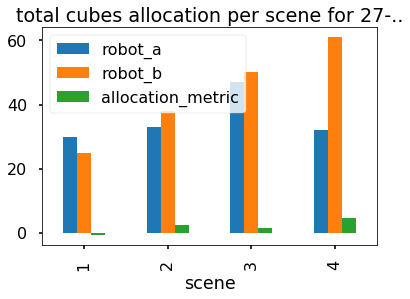

In [75]:
red_on_B.groupby("scene").sum().drop(columns=['participant']).plot(kind='bar', title = "total cubes allocation per scene for 27-..")

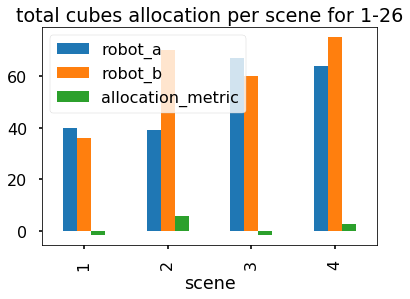

In [76]:
red_on_A = drop_colums(red_on_A, ['NVC_A','NVC_B', 'NVC'])
red_on_A = red_on_A[red_on_A['scene'] > 0]
red_on_A.groupby("scene").sum().drop(columns=['participant']).plot(kind='bar', title = "total cubes allocation per scene for 1-26")

In [77]:
red_on_A = group_data(red_on_A,['participant'])
red_on_A = drop_colums(red_on_A, ['scene'])
red_on_A['allocation_metric'] = red_on_A['allocation_metric'] / 4
red_on_A.head()

,robot_a,robot_b,allocation_metric
participant,,,
2,8,8,0.083333
3,12,11,0.011905
5,10,13,0.146429
6,1,17,0.625000
7,7,17,0.422619
8,10,12,-0.050000
9,12,12,0.002381
10,8,15,0.250000
11,4,7,0.083333


In [78]:
red_on_B = group_data(red_on_B,['participant'])
red_on_B = drop_colums(red_on_B, ['scene'])
red_on_B['allocation_metric'] = red_on_B['allocation_metric'] / 4
red_on_B

,robot_a,robot_b,allocation_metric
participant,,,
27,10,13,0.285714
28,1,8,0.833333
29,10,8,0.035714
30,14,8,-0.289286
31,8,9,0.175000
32,7,13,0.119048
33,8,12,0.000000
34,6,9,0.208333
35,7,14,0.258333


In [81]:
ranksum_colum = 'allocation_metric'

In [84]:
print(wilcoxon_ranksum_test(red_on_A_s1, red_on_B_s1, ranksum_colum))
print(wilcoxon_ranksum_test(red_on_A_s2, red_on_B_s2, ranksum_colum))
print(wilcoxon_ranksum_test(red_on_A_s3, red_on_B_s3, ranksum_colum))
print(wilcoxon_ranksum_test(red_on_A_s4, red_on_B_s4, ranksum_colum))
print(wilcoxon_ranksum_test(red_on_A, red_on_B, ranksum_colum))

RanksumsResult(statistic=0.12848405416203615, pvalue=0.8977659165656608)
RanksumsResult(statistic=0.9993204212602812, pvalue=0.3176394959316182)
RanksumsResult(statistic=-1.4133245957823977, pvalue=0.15756030531504583)
RanksumsResult(statistic=-0.770904324972217, pvalue=0.4407636433962271)
RanksumsResult(statistic=-0.9564924032062692, pvalue=0.33882352060948284)


In [88]:
temp = raw_data.copy()

In [90]:
temp[temp['participant']==33]

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC,allocation_metric
35,0,1,1,33,False,True,B,0.0
36,1,3,0,33,False,True,B,-1.0
37,2,2,2,33,False,True,B,0.0
38,3,3,3,33,False,True,B,0.0
39,4,0,7,33,False,True,B,1.0
